## Analyze Data Extracted from Google Scholar with Salaries Extracted from 'WaStEmployeeHistSalary.csv'




In [4]:

import scholarly
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

n = 600 #number of professors who's pubulication record was extracted from Google Scholar

### Import CSV file containing salaries of Washington State Employees, and remove white spaces in each column
df = pd.read_csv('WaStEmployeeHistSalary.csv')
df['Name'] = df['Name'].str.strip()
df['Affiliation'] = df['Affiliation'].str.strip()
df['Position'] = df['Position'].str.strip()

### Remove rows that are listed as 'Name Withheld'
df = df[df.Name != 'Name Withheld']

### Filter out affiliations that are not Washington State University (the most frequent university in our database)
df = df[df.Affiliation == 'University of Washington']

### Filter out positions that are not titled "Professor"
df = df[df.Position == 'PROFESSOR'].reset_index()

### Import CSV file containing publication record from Google Scholar
df_gscholar = pd.read_csv('gscholar_final.csv')

### Extract Salaries from df, and append to df_gscholar

salary_2012 = df['2012'][0:n]
salary_2013 = df['2013'][0:n]
salary_2014 = df['2014'][0:n]
salary_2015 = df['2015'][0:n]
salary_2016 = df['2016'][0:n]
salary_sum = salary_2012 + salary_2013 + salary_2014 + salary_2015 + salary_2016


df_gscholar['2012'] = salary_2012
df_gscholar['2013'] = salary_2013
df_gscholar['2014'] = salary_2014
df_gscholar['2015'] = salary_2015
df_gscholar['2016'] = salary_2016
df_gscholar['Sum of 5 Year Salaries'] = salary_sum



### Filter out NA
df_gscholar.dropna(how='any', inplace=True)

##df_gscholar = df_gscholar.drop([0])
print df_gscholar


                      Name  Total Citations  h-index  5 year h-index  \
0      MURRAY, CHRISTOPHER         172471.0    153.0           118.0   
1           DODSON, THOMAS          14551.0     54.0            35.0   
3          HARFORD, JARRAD          10101.0     30.0            28.0   
5      ELLENBOGEN, RICHARD          18433.0     59.0            45.0   
6           KUHL, PATRICIA          32058.0     79.0            52.0   
10       PALMATIER, ROBERT           8246.0     30.0            29.0   
12        MELTZOFF, ANDREW          48185.0    101.0            67.0   
14       KARPOFF, JONATHAN          12838.0     34.0            27.0   
17           ODA, DOLPHINE           2170.0     27.0            11.0   
18            GLENNY, ROBB           7537.0     48.0            23.0   
20           KOTHA, SURESH           9660.0     33.0            24.0   
22        WESSELLS, HUNTER           7357.0     51.0            32.0   
23             LEE, THOMAS          16404.0     44.0            

## First Plot
Plot pairwise relationship in the dataset

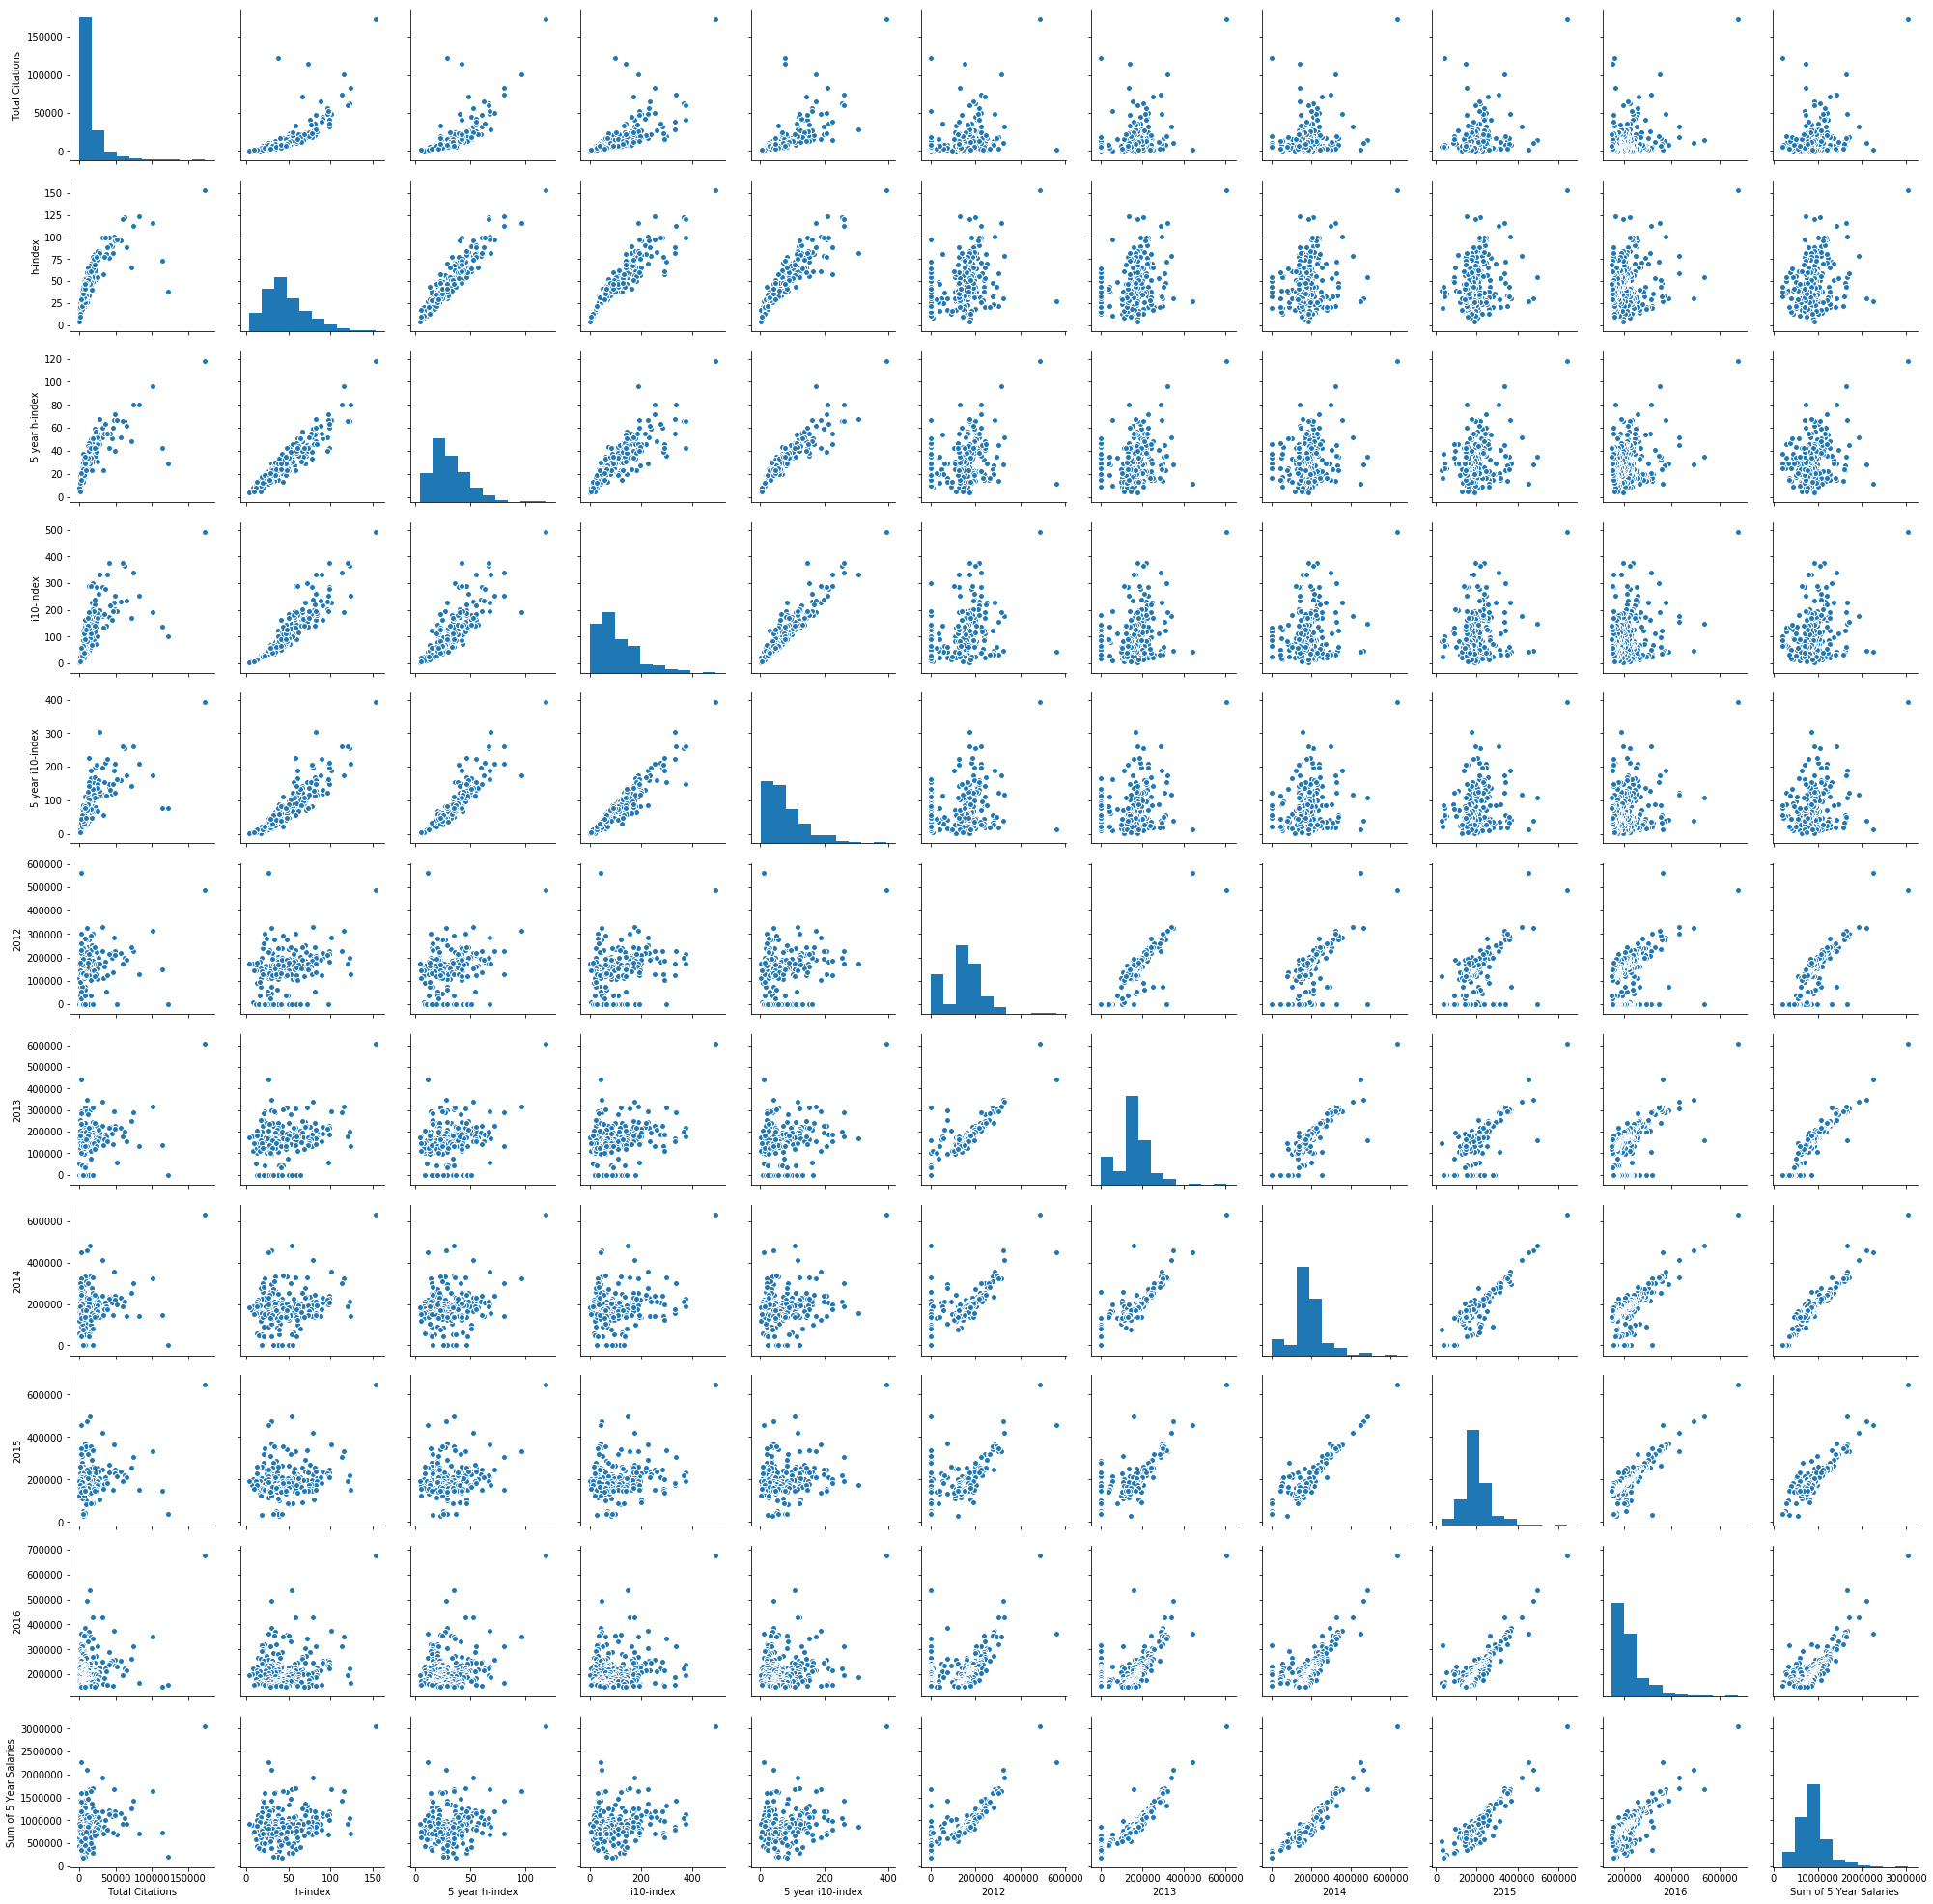

In [5]:
%matplotlib inline
### Plot pairwise relationship in the dataset
sns.pairplot(df_gscholar)
plt.show()

## Second Plot
Closer look at Sum of 5 Year Salaries vs. 5 year h-index.

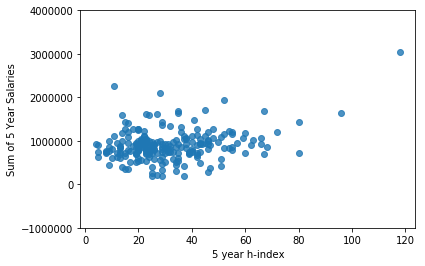

In [6]:
%matplotlib inline
g = sns.regplot(x="5 year h-index", y="Sum of 5 Year Salaries", data=df_gscholar, fit_reg=False)
g.set_ylim(-1000000,4000000)
plt.show()